<a href="https://colab.research.google.com/github/vgeneva/EKG/blob/main/EKG_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECG/EKG information
wfdb lybrary in python.

In [ ]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 kB 11.5 MB/s eta 0:00:00


# Import

In [ ]:
## Find the best match with the canonical recursion formula
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import math
import time

# MIT - BIH dataset

The MIT-BIH Arrhythmia Database is one of the most widely used datasets for research in electrocardiography (ECG). It contains 48 half-hour recordings of two-channel ECG signals from 47 different patients, primarily from the Beth Israel Hospital in Boston, Massachusetts, recorded between 1975 and 1979. The dataset includes a variety of heart arrhythmias and normal heartbeats, making it essential for developing and testing algorithms for arrhythmia detection, classification, and ECG signal processing.

Each record typically includes two ECG leads (e.g., MLII and V5) and is annotated with beat labels, identifying different types of heartbeats. It has been a benchmark dataset for evaluating automatic ECG analysis systems.

Thank you https://github.com/mikkelhartmann/ecg-analysis-mit-bih/blob/master/MIT-BIH-database.ipynb#:~:text=The%20MIT%2DBIH%20dataset,download%20and%20read%20the%20data.

In [ ]:
if os.path.isdir("mitdb"):
  print("The MIT-BIH dataset has already been downloaded.")
else:
  wfdb.dl_database('mitdb', 'mitdb')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

# Understanding the files
record is part of the wfdb library functionality. I've downloaded the files, now I am looking at the first record.

In [ ]:
# prompt: how do i know which record i'm choosing?

# Get the list of record names in the MIT-BIH dataset
record_names = wfdb.get_record_list('mitdb')

# Iterate through the records and print their names and some info
for record_name in record_names:
  record = wfdb.rdrecord('mitdb/' + record_name)
  print(f"Record name: {record_name}")
  print(f"Sample frequency: {record.fs}")
  print(f"Number of signals: {record.n_sig}")
  print(f"Signal names: {record.sig_name}")
  # ... add more information as needed ...
  print("\n") # Add a separator between records


Record name: 100
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V5']


Record name: 101
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 102
Sample frequency: 360
Number of signals: 2
Signal names: ['V5', 'V2']


Record name: 103
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V2']


Record name: 104
Sample frequency: 360
Number of signals: 2
Signal names: ['V5', 'V2']


Record name: 105
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 106
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 107
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 108
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 109
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Record name: 111
Sample frequency: 360
Number of signals: 2
Signal names: ['MLII', 'V1']


Rec

In [ ]:
'''
wfdb.io.rdann(record_name
              , extension
              , sampfrom=0
              , sampto=None
              , shift_samps=False
              , pn_dir=None
              , return_label_elements=['symbol']
              , summarize_labels=False)

wfdb.io.rdsamp(record_name
               , sampfrom=0
               , sampto=None
               , channels=None
               , pn_dir=None
               , channel_names=None
               , warn_empty=False
               , return_res=64)
'''

"\nwfdb.io.rdann(record_name\n              , extension\n              , sampfrom=0\n              , sampto=None\n              , shift_samps=False\n              , pn_dir=None\n              , return_label_elements=['symbol']\n              , summarize_labels=False)\n\nwfdb.io.rdsamp(record_name\n               , sampfrom=0\n               , sampto=None\n               , channels=None\n               , pn_dir=None\n               , channel_names=None\n               , warn_empty=False\n               , return_res=64)\n"

In [ ]:
# the entire file
#record = wfdb.rdsamp('mitdb/100')
#annotation = wfdb.rdann('mitdb/100', 'atr')

# sample up to 3000
record = wfdb.rdsamp('mitdb/100', sampto = 3000) # channel 1 is lead II
annotation = wfdb.rdann('mitdb/100', 'atr', sampto = 3000)

In [ ]:
record

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [ 0.875,  0.555],
        [ 0.925,  0.21 ],
        [ 0.795, -0.125]]),
 {'fs': 360,
  'sig_len': 3000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V5'],
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

In [ ]:
record[0]

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [ 0.875,  0.555],
       [ 0.925,  0.21 ],
       [ 0.795, -0.125]])

In [ ]:
len(record)

2

Here you can see that his patient has MLII and V5 leads only. There are usually 12 leads on the body when recording the ECG.

The 12-lead ECG is the standard for a comprehensive view of the heart's electrical activity. It combines three limb leads (I, II, III), three augmented limb leads (aVR, aVL, aVF), and six precordial leads (V1-V6), providing a 360-degree view of the heart.

Each ECG lead provides a view of the heart’s electrical activity from a different angle or perspective. The electrical impulses of the heart are recorded by electrodes placed on the body, and the configuration of these electrodes defines the lead. Each lead captures a unique projection of the heart's electrical signal, giving cardiologists insight into different aspects of heart function.

Lead II (MLII): Provides the clearest and most stable signal for continuous monitoring, often used in telemetry and during surgeries.

Precordial Leads (V1-V6): Essential for diagnosing acute coronary syndromes, including anterior and lateral wall infarctions.



record[0] has these leads:

Lead II (MLII) records the difference in electrical potential between the right arm (negative electrode) and the left leg (positive electrode). It is commonly used because it provides a clear view of the heart's electrical axis, particularly the P waves and QRS complex.


Lead V5 is part of the precordial (chest) leads and is placed on the left side of the chest. It provides a horizontal view of the heart, focusing on the lateral aspect of the left ventricle.

In [ ]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

# Plotting

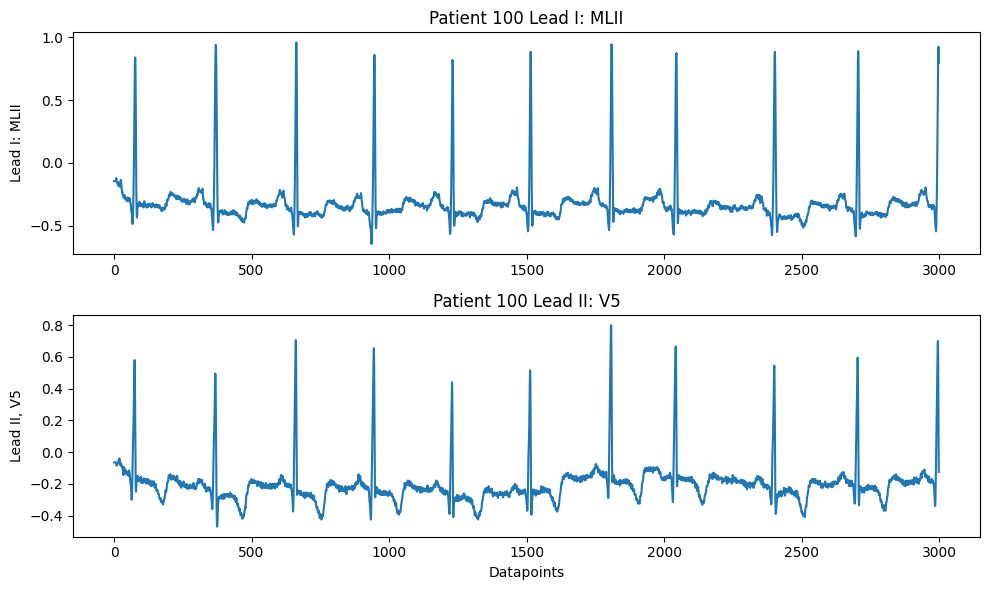

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
I = record[0][:,0]
II = record[0][:,1]
ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel("Lead I: MLII")
ax[1].set_xlabel("Datapoints")
ax[1].set_ylabel('Lead II, V5')
ax[0].set_title('Patient 100 Lead I: MLII')
ax[1].set_title('Patient 100 Lead II: V5')
plt.tight_layout()
plt.show()

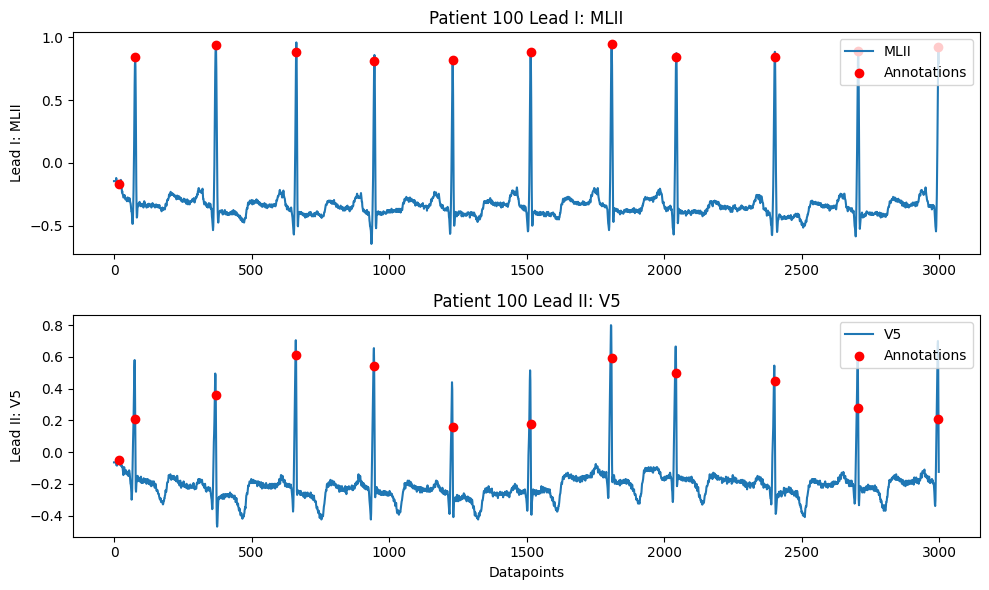

In [ ]:
# Get the annotation locations
ann_samples = annotation.sample  # Sample indices of annotations

# Create subplots
fig, ax = plt.subplots(nrows=2, figsize=(10, 6))

# Plot the signals
ax[0].plot(I, label='MLII')
ax[1].plot(II, label='V5')

# Plot annotations on Lead I (MLII)
ax[0].scatter(ann_samples, I[ann_samples], color='red', label='Annotations', zorder=3)

# Plot annotations on Lead II (V5)
ax[1].scatter(ann_samples, II[ann_samples], color='red', label='Annotations', zorder=3)

# Label the axes
ax[0].set_ylabel("Lead I: MLII")
ax[1].set_xlabel("Datapoints")
ax[1].set_ylabel("Lead II: V5")

# Add legends to both plots
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

#titles to both plots
ax[0].set_title('Patient 100 Lead I: MLII')
ax[1].set_title('Patient 100 Lead II: V5')


# Show the plot
plt.tight_layout()
plt.show();


In [ ]:
# Print sample indices of the annotations
print("Annotation samples (indices):", annotation.sample)

# Print the symbols associated with the annotations (e.g., normal beat, premature beat, etc.)
print("Annotation symbols:", annotation.symbol)

Annotation samples (indices): [  18   77  370  662  946 1231 1515 1809 2044 2402 2706 2998]
Annotation symbols: ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N']


360


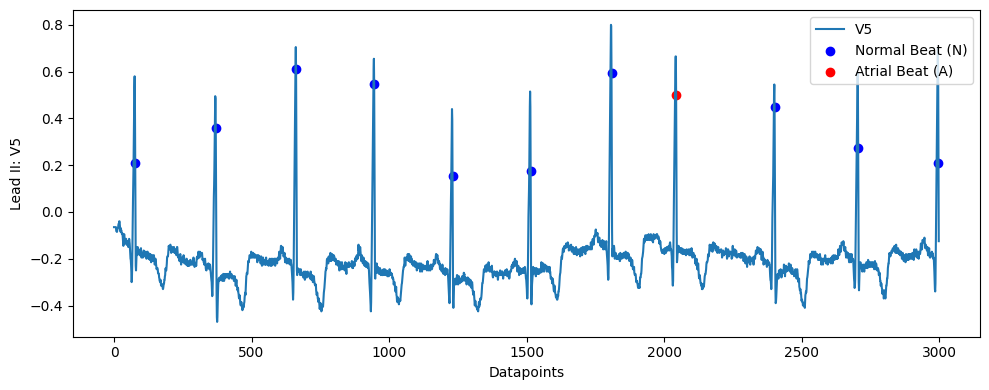

In [ ]:
# Get the annotation samples and symbols
ann_samples = annotation.sample
ann_symbols = annotation.symbol

# Get the sampling frequency
fs = record[1]['fs']
print(fs)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the signal (MLII)
ax.plot(II, label='V5')

# Plot normal beats ('N') in blue
n_indices = np.where(np.array(ann_symbols) == 'N')[0]
ax.scatter(ann_samples[n_indices], II[ann_samples[n_indices]], color='blue', label='Normal Beat (N)', zorder=1)

# Plot the 'A' beats (atrial premature contraction) in red
a_indices = np.where(np.array(ann_symbols) == 'A')[0]
ax.scatter(ann_samples[a_indices], II[ann_samples[a_indices]], color='red', label='Atrial Beat (A)', zorder=1)

# Label axes
ax.set_ylabel("Lead II: V5")
ax.set_xlabel("Datapoints")

# Add legend
ax.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


# Choose the files I want.

Did not include Ventricular escape as there is only 106 notations and they tested 105.  I am not sure how they split the test and trained.

In [ ]:
records = ['100', '111',
           '124', '200',
           '201', '208',
           '209', '212',
           '214', '221',
           '222', '231',
           '232', '234',
           '210', '207']

In [ ]:
'mitbd/' + records[0]

'mitbd/100'

In [ ]:
for rec in records:
    globals()[f'record_{rec}'] = wfdb.rdsamp('mitdb/' + rec, channels = [1]) # allows me to choose Lead II
    globals()[f'annotation_{rec}'] = wfdb.rdann('mitdb/' + rec, 'atr')

In [ ]:
record_111[0].shape

(650000, 1)

In [ ]:
annotation_100.sample

array([    18,     77,    370, ..., 649484, 649734, 649991])

Assign variables to each record:

In [ ]:
for rec in records:
    globals()[f'II{rec}'] = globals()[f'record_{rec}'][0]

In [ ]:
II234.shape

(650000, 1)

# Function for selecting the correct indexing of classes with -100 and +150 samples around it:

## Function to take annotation record and find the class

Create index for train (size 1) and testing (usually size 1000 but could be 50, 212,...) signal for paricular annotation, i.e. 'N', 'V', 'A',...

In [ ]:
# take annotation and return the training set indexing for the train data
def class_train_index(ann, anot, train_start = 0, train_points = 10):
  # selects specific annotations from signal
  ind = np.where(np.array(ann.symbol) == anot)[0]
  # chooses which index to use for training
  indsel = ind[train_start:train_points]
  #print(indsel) #select 10 points
  return ann.sample[indsel]


In [ ]:
# take annotation and return the training set indexing for the test data
def class_test_index(ann, anot, test_start = 0, test_points = 1000): #may be 50, 212, etc
  # selects specific annotations from signal
  ind = np.where(np.array(ann.symbol) == anot)[0]
  # chooses which index to use for testing
  indsel = ind[test_start:test_points] #select 1000, 922, 500, 212, 50 points
  #print(indsel)
  return ann.sample[indsel]
#

Take the indices above build 100 to the left and 156 sample points to the right of that index.  

In [ ]:
#selecting 256 samples around each index for the annotation.sample
def x_conc(ann):
  x_conc = []
  for index in ann:
    a = np.arange(index - 100, (index + 156))
    a_list = a.tolist()
    x_conc.extend(a)
  return x_conc

### Tesing 'N' train (Record: 221) and test (Record: 100) selection

In [ ]:
xcon100 = x_conc(class_train_index(annotation_100, 'N', 1, 11))
#xcon100 = class_train_index(annotation_100, record_100[0], 'N')

In [ ]:
xcon221 = x_conc(class_test_index(annotation_221, 'N'))

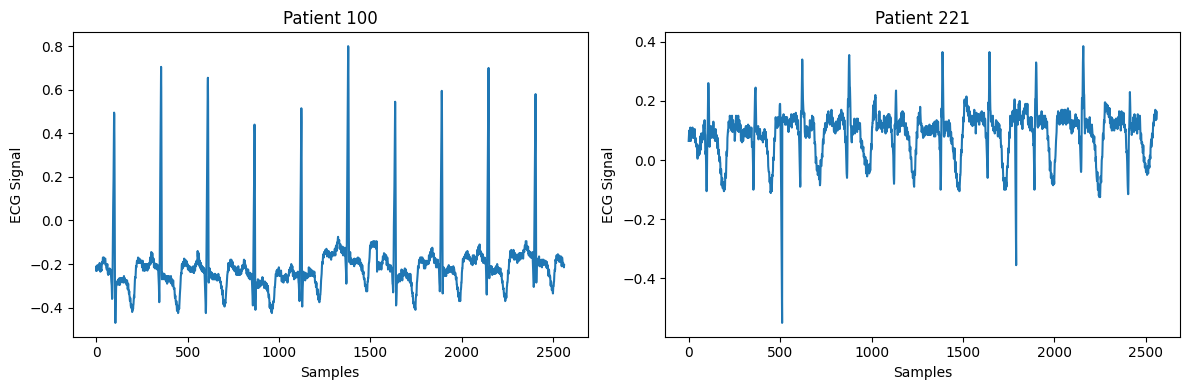

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with two subplots

# Plot xcon100 on the left subplot
ax1.plot(II100[xcon100])
ax1.set_title('Patient 100')
ax1.set_xlabel('Samples')
ax1.set_ylabel('ECG Signal')

# Plot xcon221 on the right subplot
ax2.plot(II221[xcon221][0:256*10])
ax2.set_title('Patient 221')
ax2.set_xlabel('Samples')
ax2.set_ylabel('ECG Signal')

plt.tight_layout()
plt.show()

In [ ]:
# N
xcon100 = x_conc(class_train_index(annotation_100, 'N', 1, 11))
xcon221 = x_conc(class_test_index(annotation_221, 'N'))

xcon221_train = x_conc(class_train_index(annotation_221, 'N', 1000, 1010))
xcon221_test = x_conc(class_test_index(annotation_221, 'N', 0, 1000))

# A
xcon209 = x_conc(class_train_index(annotation_209, 'A'))
xcon232 = x_conc(class_test_index(annotation_232, 'A'))

xcon232_train = x_conc(class_train_index(annotation_232, 'A', 1000, 1010))
xcon232_test = x_conc(class_test_index(annotation_232, 'A', 0, 1000))

# L
xcon111 = x_conc(class_train_index(annotation_111, 'L'))
xcon214 = x_conc(class_test_index(annotation_214, 'L', 0, 500))

xcon214_train = x_conc(class_train_index(annotation_214, 'L', 500, 510))
xcon214_test = x_conc(class_test_index(annotation_214, 'L', 0, 500))

# R
xcon212 = x_conc(class_train_index(annotation_212, 'R'))
xcon231 = x_conc(class_test_index(annotation_231, 'R', 0, 500))

xcon231_train = x_conc(class_train_index(annotation_231, 'R', 500, 510))
xcon231_test = x_conc(class_test_index(annotation_231, 'R', 0, 500))

# J
xcon124 = x_conc(class_train_index(annotation_124, 'J'))
xcon234 = x_conc(class_test_index(annotation_234, 'J', 0, 50))

# V
xcon200 = x_conc(class_train_index(annotation_200, 'V')) #, 50, 60))
xcon208 = x_conc(class_test_index(annotation_208, 'V', 0, 992))
# j
xcon201 = x_conc(class_train_index(annotation_201, 'j'))
xcon222 = x_conc(class_test_index(annotation_222, 'j', 0, 212))
# E
xcon207_train = x_conc(class_train_index(annotation_207, 'E', 0, 10))
xcon207_test = x_conc(class_test_index(annotation_207, 'E', 10, 105))

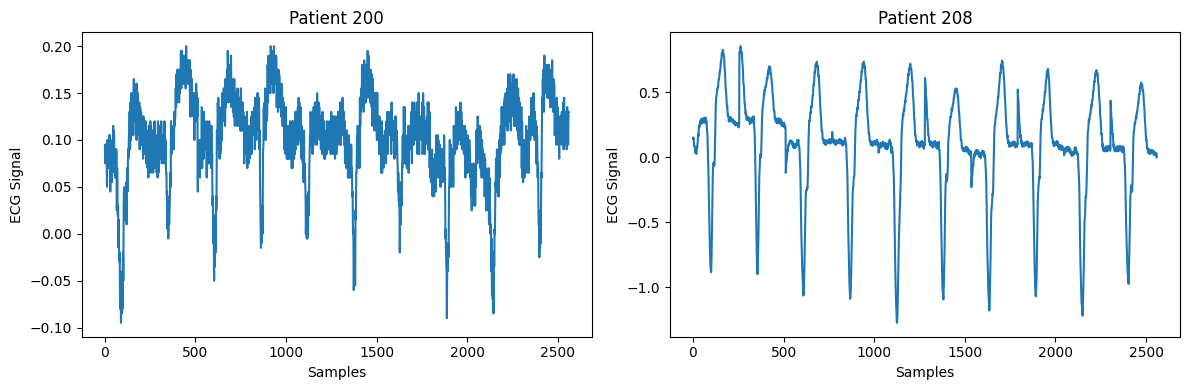

In [ ]:
II200 = record_200[0]
II208 = record_208[0]
# Plot xcon200 on the right subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(II200[xcon200])
ax1.set_title('Patient 200')
ax1.set_xlabel('Samples')
ax1.set_ylabel('ECG Signal')

ax2.plot(II208[xcon208][0:256*10])
ax2.set_title('Patient 208')
ax2.set_xlabel('Samples')
ax2.set_ylabel('ECG Signal')

plt.tight_layout()
plt.show();

In [ ]:
print(len(class_train_index(annotation_201, 'j')))
print(len(xcon201))
print(len(class_train_index(annotation_124, 'J')))

print(len(xcon207_train))
print(len(xcon124))
print(len(xcon234))
print(len(class_test_index(annotation_234, 'J', 0, 50)))

10
2560
10
2560
2560
12800
50


In [ ]:
#len(x_conc(class_train_index(annotation_210, 'E', 0, 10)))

# Tune data
1) Butterworth high-pass filter of 0.5 Hz

2) Low-pass filter fo 40 Hz

3) Z normalization

## Functions for filters

In [ ]:
# Define the cutoff frequencies for the high-pass and low-pass filters
high_cutoff = 0.5  # High-pass filter cutoff frequency in Hz
low_cutoff = 40.0  # Low-pass filter cutoff frequency in Hz

# High-pass filter at 0.5 Hz
def butter_high(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-pass filter at 40 Hz
def butter_low(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)


### High-pass, low-pass, normalization function


In [ ]:
def total_fil_nor(data, h_cutoff = 0.5, l_cutoff = 40.0, order = 4):
    x = butter_high(data[0].squeeze(), h_cutoff, fs = data[1]['fs'], order=4) # record needs to ben 1D .squeeze()
    y = butter_low(data[0].squeeze(), l_cutoff, fs = data[1]['fs'], order=4)
    normalized = zscore(y)
    return normalized

## E.g., Filtered and normalized plotted data

In [ ]:
record_201[1]['fs']

360

In [ ]:
#filtnorm_201 = total_fil_nor(record_201, h_cutoff = 0.5, l_cutoff=40., order=4)
#filtnorm_201.shape

### Record 201, training data for 'j'

In [ ]:
filtnorm_201 = total_fil_nor(record_201)
filtnorm_201.shape

(650000,)

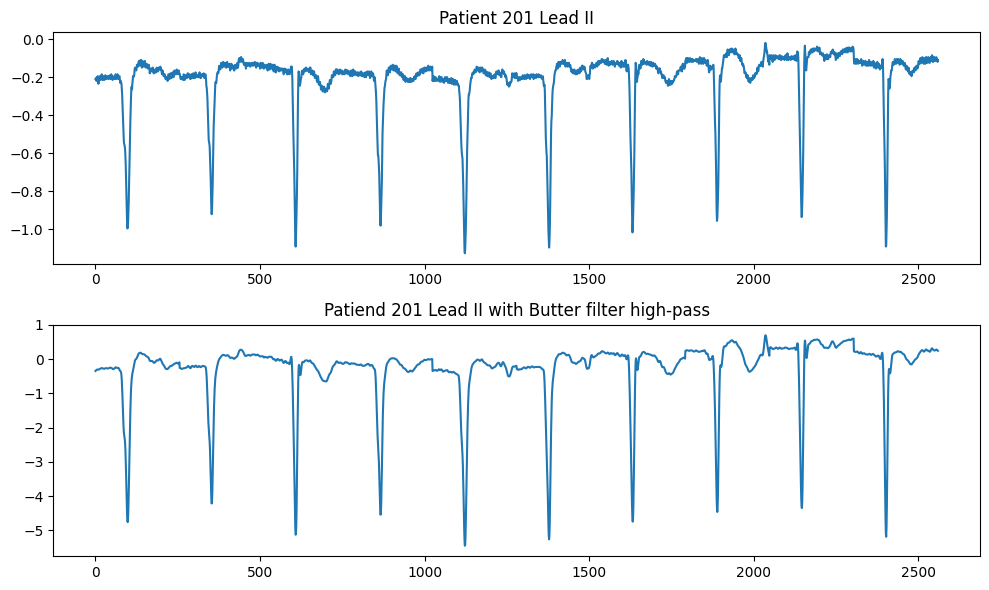

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))

ax[0].plot(II201[xcon201]);
ax[0].set_title('Patient 201 Lead II')
ax[1].plot(filtnorm_201[xcon201]);
ax[1].set_title('Patiend 201 Lead II with Butter filter high-pass')
plt.tight_layout()
plt.show()

## Make all records filtered:

In [ ]:
for rec in records:
  globals()[f'filtnorm_{rec}'] = total_fil_nor(globals()[f'record_{rec}'])


### Fitered Training data (100) and testing(221) for 'N'


In [ ]:
annotation_100.sample

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [ ]:
N_index = class_train_index(annotation_100, 'N', 1, 11)
print(N_index)
N_index_test = class_test_index(annotation_221, 'N')
print(N_index_test[0:10])

[ 370  662  946 1231 1515 1809 2402 2706 2998 3282]
[ 220  442  924 1241 1804 2064 2356 2825 3064 3525]


In [ ]:
xcon100[256*0:256*1][100:110]

[370, 371, 372, 373, 374, 375, 376, 377, 378, 379]

In [ ]:
filtnorm_100[N_index]

array([3.18107728, 4.48894263, 4.07777761, 1.96733661, 2.17570626,
       4.6610953 , 3.62649963, 2.7421129 , 2.89762113, 3.54539355])

In [ ]:
filtnorm_221[N_index_test][0:10]

array([-0.64853164, -0.67018222, -0.42445302, -0.24208786, -0.59908231,
       -0.53030575, -0.3892036 , -0.47916988, -0.18319604, -0.88250032])

In [ ]:
#ax[0].scatter(ann_samples, filtnorm_201[ann_samples], color='red', label='Annotations', zorder=3)
#ax[0].legend(loc='upper right')

In [ ]:
print(len(filtnorm_100[xcon100]))

2560


In [ ]:
marker_y_level = 0.1
start = 100
interval = 256
# Calculate marker positions
marker_indices = np.arange(100, len(filtnorm_100[xcon100]), interval)
#marker_indices[0] = 100
print(marker_indices)
x_100 = np.arange(0, len(filtnorm_100[xcon100]))
x_100.shape
print(x_100[2550:2560])

[ 100  356  612  868 1124 1380 1636 1892 2148 2404]
[2550 2551 2552 2553 2554 2555 2556 2557 2558 2559]


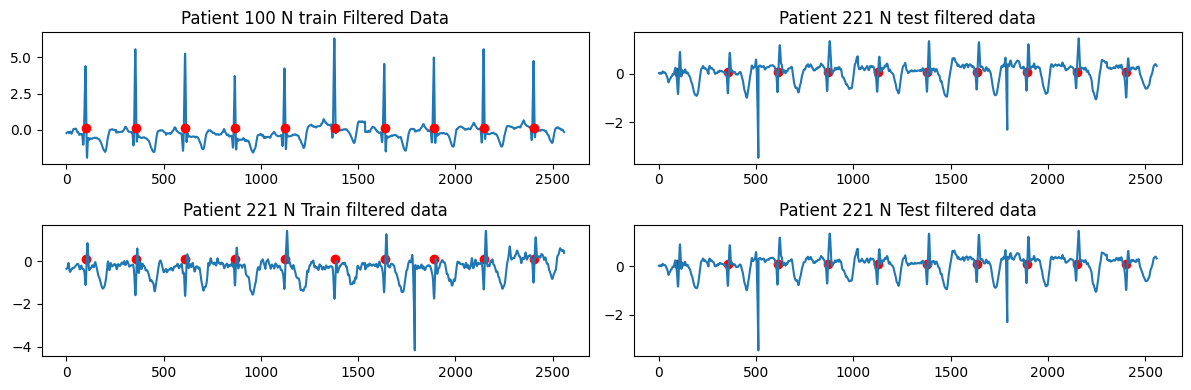

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 4))
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))

ax1.plot(filtnorm_100[xcon100]);
#ax[0].plot(xcon100, filtnorm_100[xcon100]);
ax1.set_title('Patient 100 N train Filtered Data')
# Plot annotations on Lead I (MLII)
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
#ax[0].scatter(ann_samples, filtnorm_201[ann_samples], color='red', label='Annotations', zorder=3)
#ax[0].legend(loc='upper right')

ax2.plot(filtnorm_221[xcon221][0:256*10]);
#ax[1].plot(xcon221[0:256*10], filtnorm_221[xcon221][0:256*10]);
ax2.set_title('Patient 221 N test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')#, zorder=2);


ax3.plot(filtnorm_221[xcon221_train]);
ax3.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax3.set_title('Patient 221 N Train filtered data')

ax4.plot(filtnorm_221[xcon221_test][0:256*10]);
ax4.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax4.set_title('Patient 221 N Test filtered data')

plt.tight_layout()
plt.show()

### Fitered Training data (209) and testing (232) for 'A'

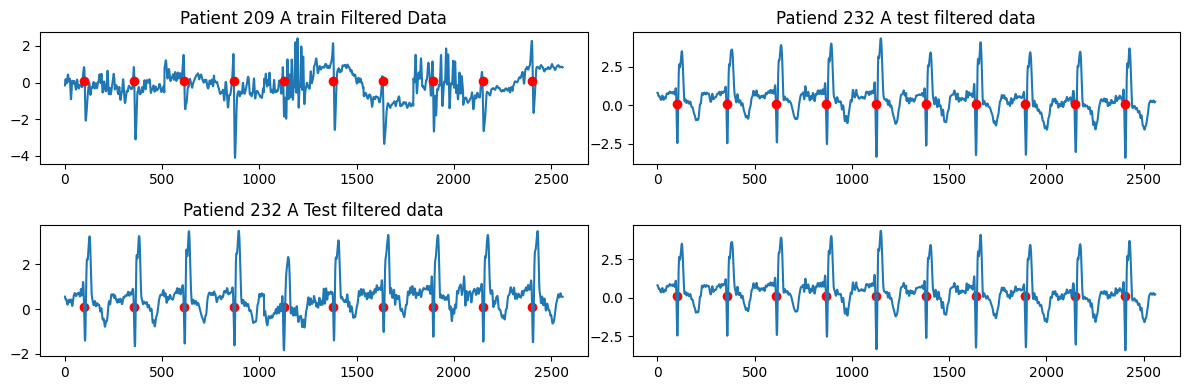

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 4))

ax1.plot(filtnorm_209[xcon209]);
ax1.set_title('Patient 209 A train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);

ax2.plot(filtnorm_232[xcon232][0:256*10]);
ax2.set_title('Patiend 232 A test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=2);

ax3.plot(filtnorm_232[xcon232_train]);
ax3.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax3.set_title('Patiend 232 A Train filtered data')

ax4.plot(filtnorm_232[xcon232_test][0:256*10]);
ax4.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax3.set_title('Patiend 232 A Test filtered data')

plt.tight_layout()
plt.show()

### Fitered Training data (111) and testing (214) for 'L'

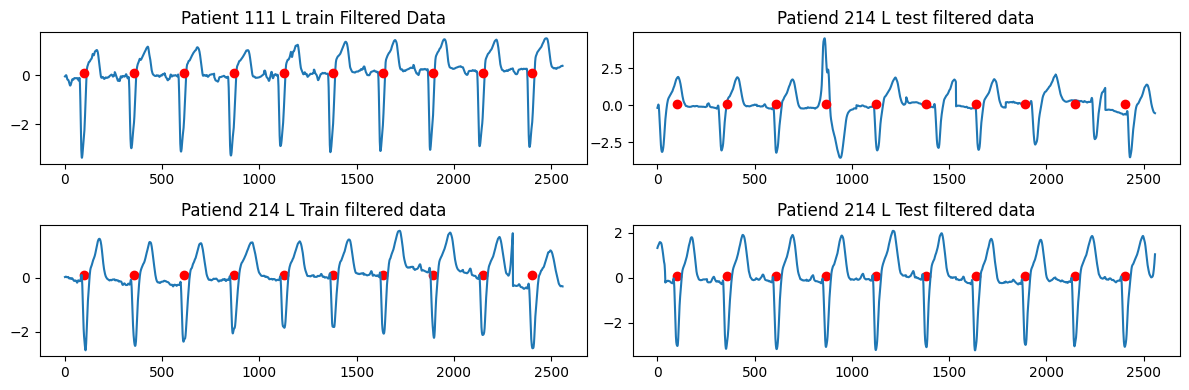

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, ((ax1, ax2) , (ax3, ax4))= plt.subplots(2, 2, figsize=(12, 4))

ax1.plot(filtnorm_111[xcon111]);
ax1.set_title('Patient 111 L train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_214[xcon232][0:256*10]);
ax2.set_title('Patiend 214 L test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=2);

ax3.plot(filtnorm_214[xcon214_train]);
ax3.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax3.set_title('Patiend 214 L Train filtered data')

ax4.plot(filtnorm_214[xcon214_test][0:256*10]);
ax4.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax4.set_title('Patiend 214 L Test filtered data')

plt.tight_layout()
plt.show()

### Fitered Training data (212) and testing (231) for 'R'

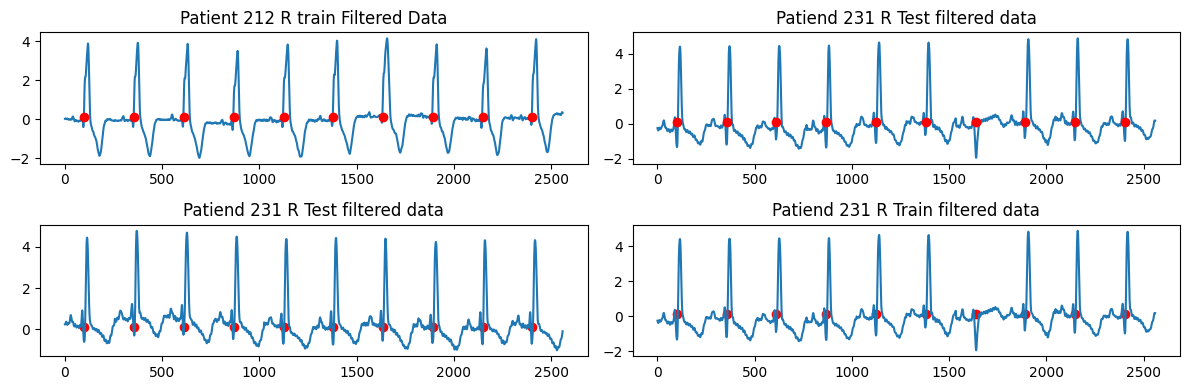

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 4))

ax1.plot(filtnorm_212[xcon212]);
ax1.set_title('Patient 212 R train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_231[xcon231][0:256*10]);
ax2.set_title('Patiend 231 R Test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);

ax3.plot(filtnorm_231[xcon231_train]);
ax3.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax3.set_title('Patiend 231 R Test filtered data')

ax4.plot(filtnorm_231[xcon231_test][0:256*10]);
ax4.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax4.set_title('Patiend 231 R Train filtered data')

plt.tight_layout()
plt.show()

### Fitered Training data (124) and testing (234) for 'J'

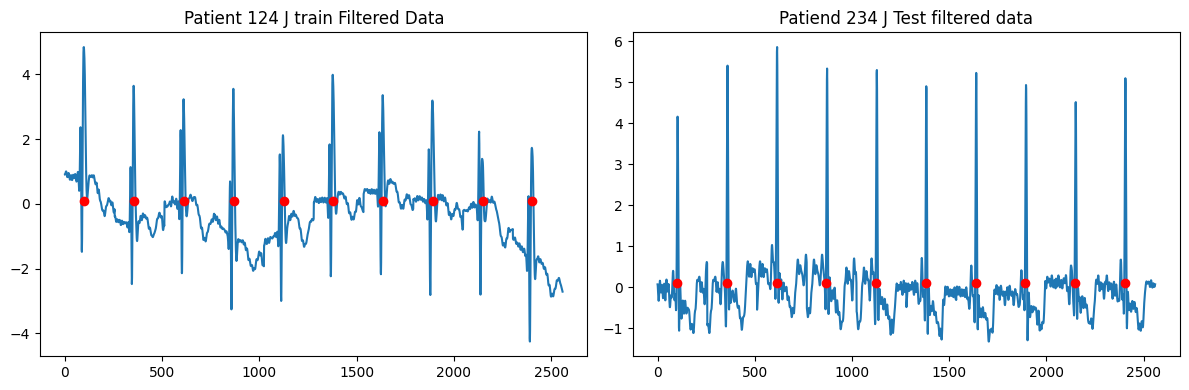

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(filtnorm_124[xcon124]);
ax1.set_title('Patient 124 J train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_234[xcon234][0:256*10]);
ax2.set_title('Patiend 234 J Test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);



plt.tight_layout()
plt.show()

### Fitered Training data (200) and testing (208) for 'V'

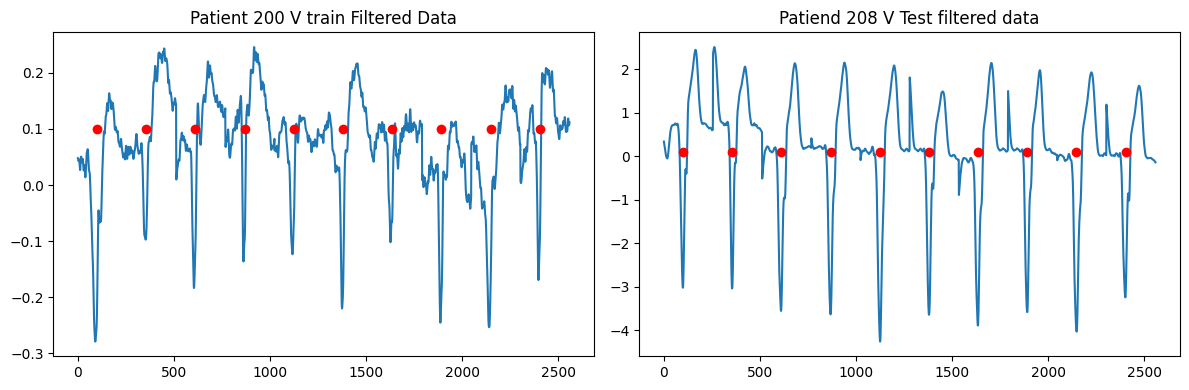

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(filtnorm_200[xcon200]);
ax1.set_title('Patient 200 V train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_208[xcon208][0:256*10]);
ax2.set_title('Patiend 208 V Test filtered data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=4);
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Patient 221 N test Filtered Data')

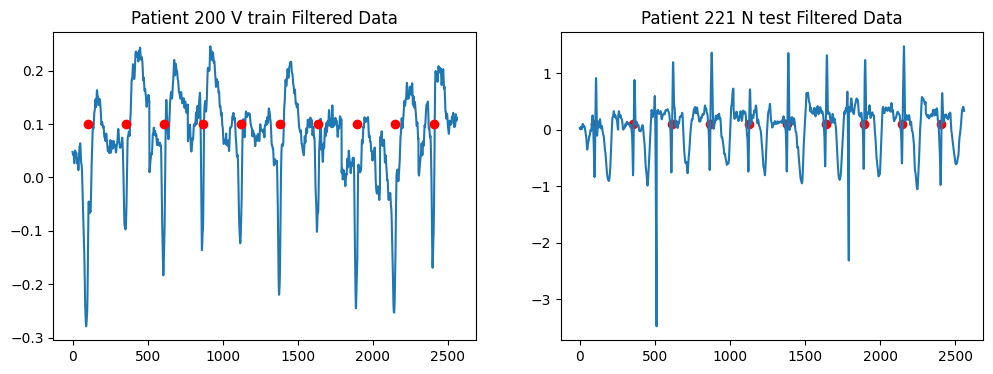

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(filtnorm_200[xcon200]);
ax1.set_title('Patient 200 V train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);

# N test
ax2.plot(filtnorm_221[xcon221_test][0:256*10]);
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations')
ax2.set_title('Patient 221 N test Filtered Data')

44.590140959509085


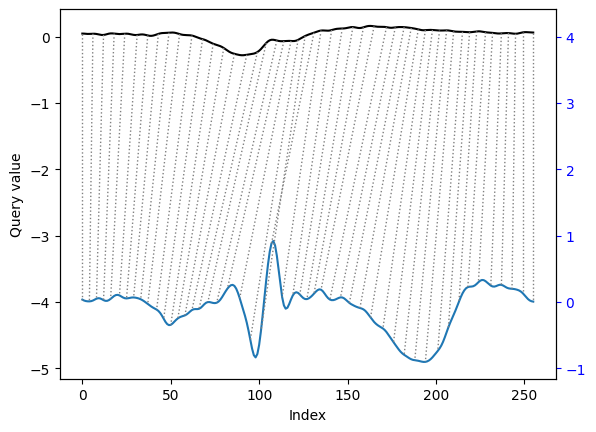

In [ ]:
alig_VN = dtw(filtnorm_200[xcon200][0:256*1], filtnorm_221[xcon221_test][0:256*1])
print(alig_VN.distance)

dtw(filtnorm_200[xcon200][0:256*1], filtnorm_221[xcon221_test][0:256*1], keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4);

### Fitered Training data (201) and testing (22) for 'j'

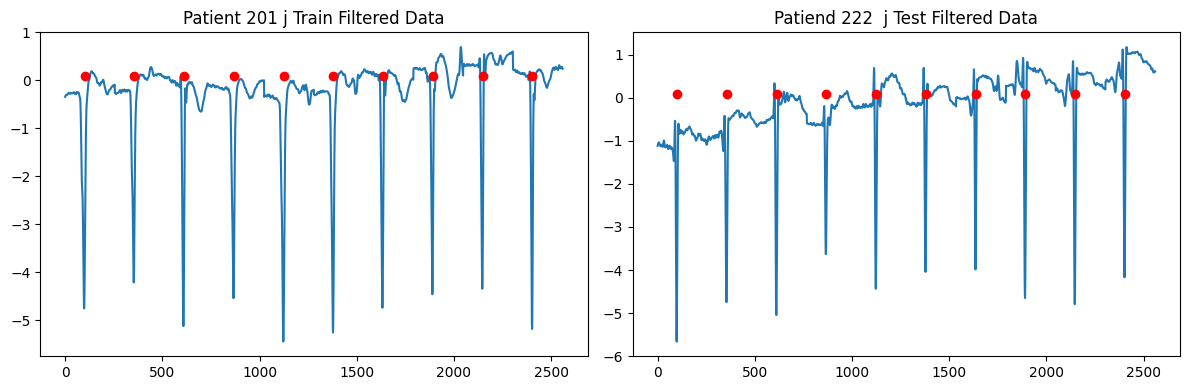

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(filtnorm_201[xcon201]);
ax1.set_title('Patient 201 j Train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_222[xcon222][0:256*10]);
ax2.set_title('Patiend 222  j Test Filtered Data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
plt.tight_layout()
plt.show()

### Fitered Training data (207) and testing (207) for 'E'

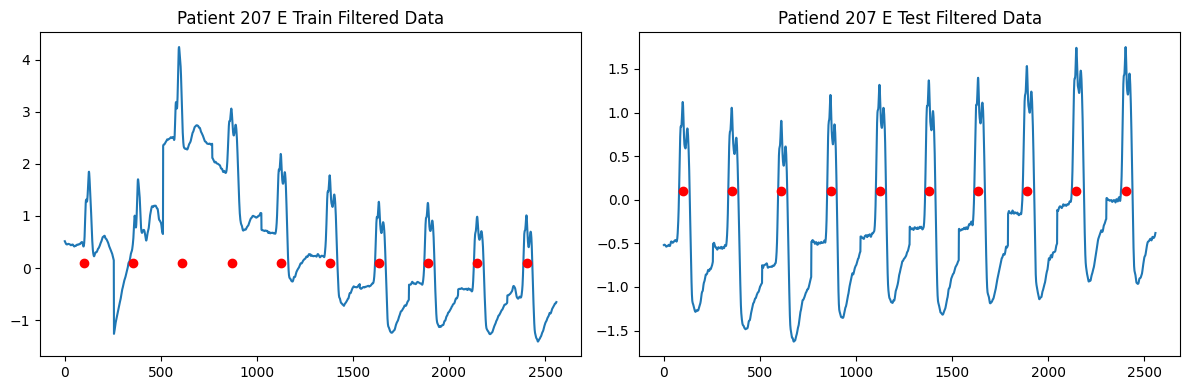

In [ ]:
#fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(filtnorm_207[xcon207_train]);
ax1.set_title('Patient 207 E Train Filtered Data')
ax1.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
ax2.plot(filtnorm_207[xcon207_test][0:256*10]);
ax2.set_title('Patiend 207 E Test Filtered Data')
ax2.scatter(marker_indices, [marker_y_level]*len(marker_indices), color='red', label='Annotations', zorder=3);
plt.tight_layout()
plt.show()

# DTW - some intial results


TEST: let's obtain one train and one test array and conduct the DTW.

## 'j': TRIAN: 201, TEST: 222,

In [ ]:
filtnorm_201.shape

(650000,)

In [ ]:
train_j_1 = filtnorm_201[xcon201][256*0:256*1]
test_j_1 = filtnorm_222[xcon222][256*0:256*1]
print(train_j_1.shape)
print(test_j_1.shape)

(256,)
(256,)


In [ ]:
'''train_j_1 = norm_filt_201_train[x_conc_train_201[0:256]].squeeze()
test_j_1 = norm_filt_222_test[x_conc_test_222[0:256]].squeeze()
print(train_j_1.shape)
print(test_j_1.shape)
'''

'train_j_1 = norm_filt_201_train[x_conc_train_201[0:256]].squeeze()\ntest_j_1 = norm_filt_222_test[x_conc_test_222[0:256]].squeeze()\nprint(train_j_1.shape)\nprint(test_j_1.shape)\n'

dtw(a,b), a is reference, b is query.

234.3137265884828
(500,)
(500,)


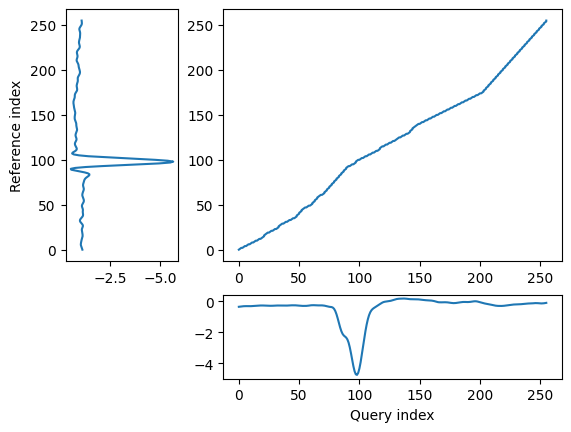

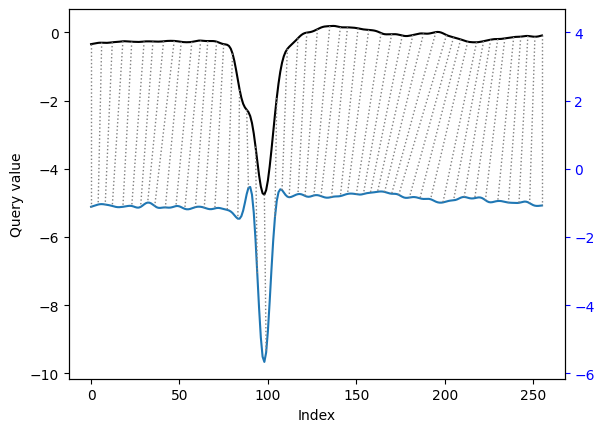

In [ ]:
alig_jj_11 = dtw(train_j_1, test_j_1)
#plt.plot(alig.index1, alig.index2) #index1 is for phi_1, index2 is for phi_0
dtw(train_j_1,
    test_j_1, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="threeway")
#print(alig.index1)
#print(alig.index2)
#print(find_repeats(alig.index1))
#print(find_repeats(alig.index2))
print(alig_jj_11.distance)
print(alig_jj_11.index1.shape)
print(alig_jj_11.index2.shape)

dtw(train_j_1,
    test_j_1, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4);# offset is +2, would switch if -2; reference is phi_0, query is phi_1

In [ ]:
train_j_1 = filtnorm_201[xcon201][256*0:256*1]
test_j_2 = filtnorm_222[xcon222][256*1:256*2]
print(train_j_1.shape)
print(test_j_2.shape)

(256,)
(256,)


124.77012381257876


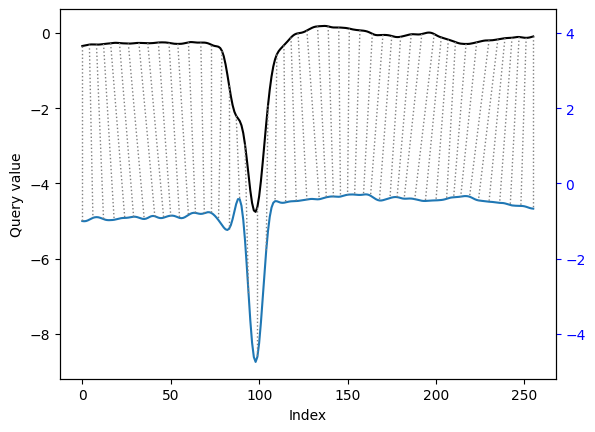

In [ ]:
alig_jj_12 = dtw(train_j_1, test_j_2)
dtw(train_j_1,
    test_j_2, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_jj_12.distance)

In [ ]:
train_j_1 = filtnorm_201[xcon201][256*0:256*1]
test_j_3 = filtnorm_222[xcon222][256*2:256*3]
print(train_j_1.shape)
print(test_j_3.shape)

(256,)
(256,)


43.76873098675465


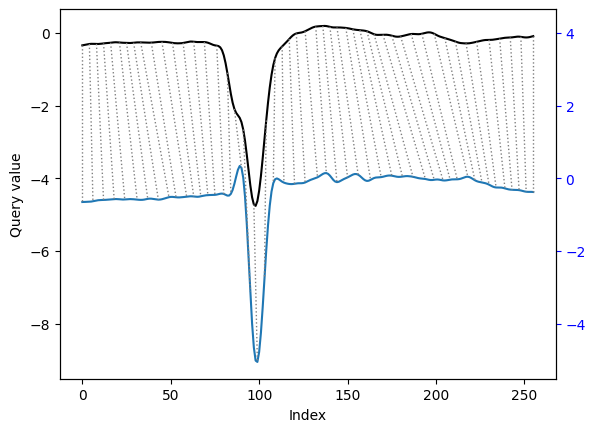

In [ ]:
alig_jj_13 = dtw(train_j_1, test_j_3)
dtw(train_j_1,
    test_j_3, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_jj_13.distance)

## 'N', TRAIN: 100, TEST: 221


In [ ]:
train_N_1 = filtnorm_100[xcon100][256*0:256*1]
test_N_1 = filtnorm_221[xcon221][256*0:256*1]
print(train_N_1.shape)
print(test_N_1.shape)

(256,)
(256,)


91.42539745990145


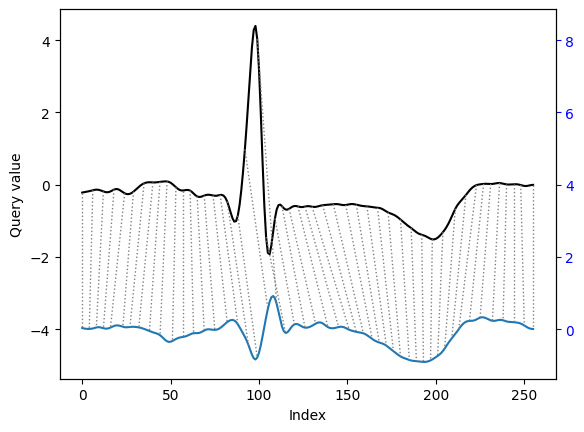

In [ ]:
alig_NN_11 = dtw(train_N_1, test_N_1)
dtw(train_N_1,
    test_N_1, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_NN_11.distance)

In [ ]:
train_N_1 = filtnorm_100[xcon100][256*0:256*1]
test_N_2 = filtnorm_221[xcon221][256*1:256*2]
print(train_N_1.shape)
print(test_N_1.shape)

(256,)
(256,)


114.11567734623608


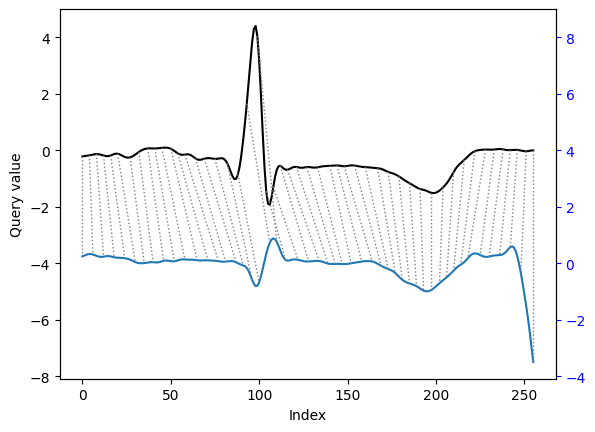

In [ ]:
alig_NN_12 = dtw(train_N_1, test_N_2)
dtw(train_N_1,
    test_N_2, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_NN_12.distance)

In [ ]:
train_N_2 = filtnorm_100[xcon100][256*1:256*2]
test_N_2 = filtnorm_221[xcon221][256*1:256*2]
print(train_N_2.shape)
print(test_N_2.shape)

(256,)
(256,)


106.01997945636141


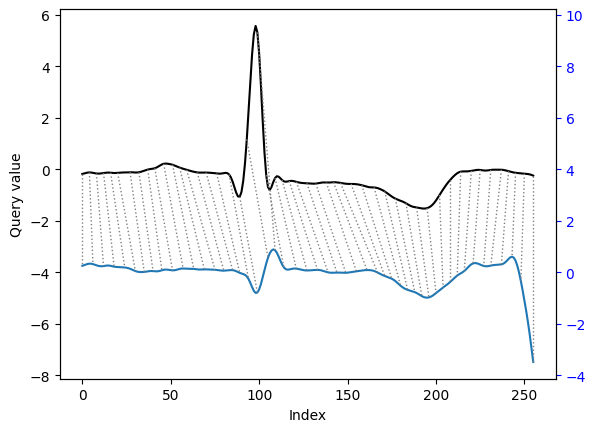

In [ ]:
alig_NN_22 = dtw(train_N_2, test_N_2)
dtw(train_N_2,
    test_N_2, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_NN_22.distance)

In [ ]:
train_N_2 = filtnorm_100[xcon100][256*1:256*2]
test_N_3 = filtnorm_221[xcon221][256*2:256*3]
print(train_N_2.shape)
print(test_N_3.shape)

(256,)
(256,)


115.13433107916426


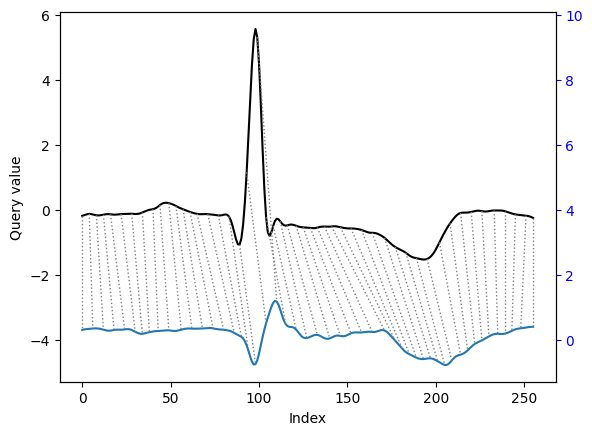

In [ ]:
alig_NN_23 = dtw(train_N_2, test_N_3)
dtw(train_N_2,
    test_N_3, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_NN_23.distance)

In [ ]:
print(train_N_2[-1])
print(test_N_3[-1])

-0.2505983322302512
0.403514389892973


## N, Train: 100, j, Test: 222

In [ ]:
train_N_1 = filtnorm_100[xcon100][256*0:256*1]
test_j_1 = filtnorm_222[xcon100][256*0:256*1]
print(train_N_1.shape)
print(test_j_1.shape)

(256,)
(256,)


664.523884431016


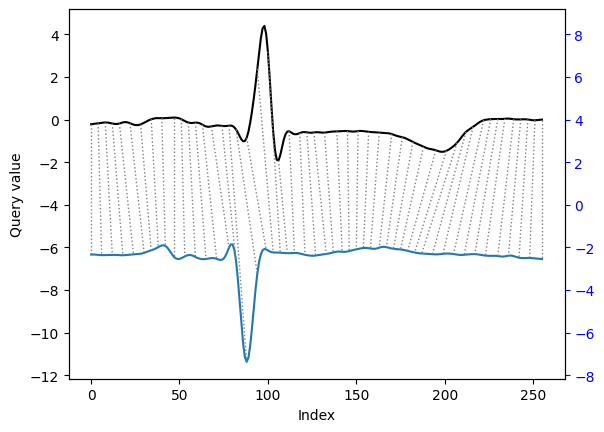

In [ ]:
alig_Nj_11 = dtw(train_N_1, test_j_1)
dtw(train_N_1,
    test_j_1, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_Nj_11.distance)

In [ ]:
train_N_2 = filtnorm_100[xcon100][256*1:256*2]
test_j_1 = filtnorm_222[xcon100][256*0:256*1]
print(train_N_2.shape)
print(test_j_1.shape)

(256,)
(256,)


755.5097797132984


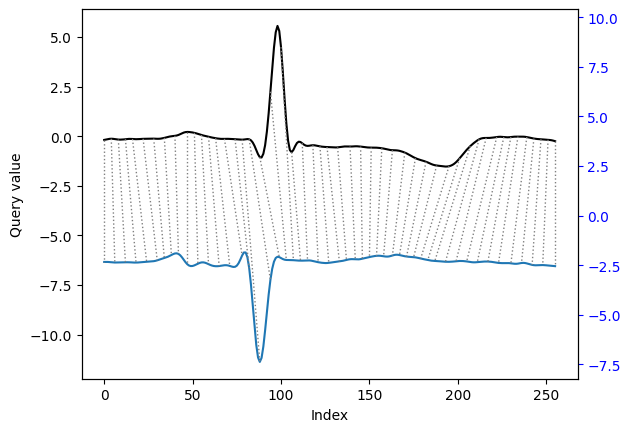

In [ ]:
alig_Nj_21 = dtw(train_N_2, test_j_1)
dtw(train_N_2,
    test_j_1, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-4)# offset is +2, would switch if -2; reference is phi_0, query is phi_1

print(alig_Nj_21.distance)

## Some results

In [ ]:
DTW_results = [alig_NN_11.distance, alig_NN_12.distance, alig_NN_22.distance
               , alig_NN_23.distance, alig_Nj_11.distance, alig_Nj_21.distance
               , alig_jj_11.distance, alig_jj_12.distance, alig_jj_13.distance]

In [ ]:
DTW_results

[91.42539745990145,
 114.11567734623608,
 106.01997945636141,
 115.13433107916426,
 664.523884431016,
 755.5097797132984,
 234.3137265884828,
 124.77012381257876,
 43.76873098675465]

In [ ]:
l = []
for i in range(256):
  l.append(i * 256)

print(len(l))
np.zeros((256, 2560)).shape

256


(256, 2560)

# Functions to make TRAIN Matrix for a class and a TEST Matris for a class

In [ ]:
train_N_2 = filtnorm_100[xcon100][256*1:256*2]
print(train_N_2.shape)

(256,)


## Train matrix function:

In [ ]:
def make_TRAIN_Matrix(filtered_data, x, datapoints = 10):
  TRAIN_matrix = np.zeros((256, datapoints)) #(256 in each training set, 10 training sets
  for i in range(datapoints): #number of training sets
    #print(filtered_data[x[256*i:256*(i+1)]].shape)
    TRAIN_matrix[:,i] = filtered_data[x[256*i:256*(i+1)]]

  return TRAIN_matrix

### N Train_matrix

In [ ]:
#N_train_matrix = make_TRAIN_Matrix(filtnorm_100, xcon100)

In [ ]:
N_train_matrix = make_TRAIN_Matrix(filtnorm_221, xcon221_train)

In [ ]:
N_train_matrix.shape

(256, 10)

In [ ]:
N_train_matrix

array([[-0.35242678, -0.30194851, -0.36346959, ..., -0.19750499,
        -0.29818861,  0.20796359],
       [-0.34398645, -0.34156898, -0.41490948, ..., -0.1821813 ,
        -0.29160986,  0.23245585],
       [-0.34195985, -0.36176052, -0.46020304, ..., -0.17418811,
        -0.25795992,  0.25409429],
       ...,
       [-0.16696423, -0.39943636, -0.09324067, ..., -0.29818861,
         0.15042545,  0.49475258],
       [-0.15779692, -0.3935372 , -0.104739  , ..., -0.29160986,
         0.14605955,  0.45222546],
       [-0.15732569, -0.38568702, -0.10602093, ..., -0.25795992,
         0.14598299,  0.39728401]])

In [ ]:
N_train_matrix[:,1][0:10]

array([-0.30194851, -0.34156898, -0.36176052, -0.35927415, -0.33710706,
       -0.30163484, -0.25952982, -0.21649731, -0.17775333, -0.14852312])

In [ ]:
train_N_2[0:10]

array([-0.18537187, -0.16862913, -0.14876373, -0.13289309, -0.12674551,
       -0.13163544, -0.14406332, -0.15805298, -0.16837066, -0.17238859])

### A Train_matrix

In [ ]:
#A_train_matrix = make_TRAIN_Matrix(filtnorm_209, xcon209)
A_train_matrix = make_TRAIN_Matrix(filtnorm_232, xcon232_train)

### L Train_matrix

In [ ]:
#L_train_matrix = make_TRAIN_Matrix(filtnorm_111, xcon111)
L_train_matrix = make_TRAIN_Matrix(filtnorm_214, xcon214_train)

### R Train_matrix

In [ ]:
#R_train_matrix = make_TRAIN_Matrix(filtnorm_212, xcon212)
R_train_matrix = make_TRAIN_Matrix(filtnorm_231, xcon231_train)

### J Train_matrix

In [ ]:
J_train_matrix = make_TRAIN_Matrix(filtnorm_124, xcon124)

### V Train_matrix

In [ ]:
V_train_matrix = make_TRAIN_Matrix(filtnorm_200, xcon200)

### j Train_matrix

In [ ]:
j_train_matrix = make_TRAIN_Matrix(filtnorm_201, xcon201)

### E Train_matrix

In [ ]:
E_train_matrix = make_TRAIN_Matrix(filtnorm_207, xcon207_train)

## Test matrix function

In [ ]:
def make_TEST_Matrix(filtered_data, x, datapoints = 1000): #usually datapoints is 1000, but some are 212, ie. 'j'
  TEST_matrix = np.zeros((256, datapoints)) #(256 in each training set, 10 training sets
  for i in range(datapoints): #number of training sets
    #print(filtered_data[x[256*i:256*(i+1)]].shape)
    TEST_matrix[:,i] = filtered_data[x[256*i:256*(i+1)]]

  return TEST_matrix

### N Test_matrix

In [ ]:
#N_test_matrix = make_TEST_Matrix(filtnorm_221, xcon221)
N_test_matrix = make_TEST_Matrix(filtnorm_221, xcon221_test)

In [ ]:
test_N_1 = filtnorm_221[xcon221[0:256*1]]

In [ ]:
N_test_matrix[:,0][0:10]

array([0.03438324, 0.02015736, 0.01199378, 0.00802001, 0.0073261 ,
       0.01095255, 0.02024484, 0.03409463, 0.04783284, 0.05524665])

In [ ]:
test_N_1[0:10]

array([0.03438324, 0.02015736, 0.01199378, 0.00802001, 0.0073261 ,
       0.01095255, 0.02024484, 0.03409463, 0.04783284, 0.05524665])

### A Test_matrix

In [ ]:
#A_test_matrix = make_TEST_Matrix(filtnorm_232, xcon232)
A_test_matrix = make_TEST_Matrix(filtnorm_232, xcon232_test)

### L Test_matrix

In [ ]:
#L_test_matrix = make_TEST_Matrix(filtnorm_214, xcon214, datapoints = 500)
L_test_matrix = make_TEST_Matrix(filtnorm_214, xcon214_test, datapoints = 500)

### R Test_matrix

In [ ]:
#R_test_matrix = make_TEST_Matrix(filtnorm_231, xcon231, datapoints = 500)
R_test_matrix = make_TEST_Matrix(filtnorm_231, xcon231_test, datapoints = 500)

### J Test_matrix

In [ ]:
J_test_matrix = make_TEST_Matrix(filtnorm_234, xcon234, datapoints = 50)

### V Test_matrix

In [ ]:
V_test_matrix = make_TEST_Matrix(filtnorm_208, xcon208, datapoints = 992)

### j Test_matrix

In [ ]:
j_test_matrix = make_TEST_Matrix(filtnorm_222, xcon222, datapoints = 212)

### E Test_matrx

In [ ]:
E_test_matrix = make_TEST_Matrix(filtnorm_207, xcon207_test, datapoints = 95)

# Some more results:

IDEA: I will make CSV files for all TEST and TRAIN data.

In [ ]:
NN_dist_matrix = np.zeros((10,1000))
for i in range(10):
  for j in range(1000):
    NN_dist_matrix[i,j] = dtw(N_train_matrix[:,i], N_test_matrix[:,j]).distance

## Function to create distance matrix:


In [ ]:
def DIST_matrix(Train_matrix, Test_matrix, train_datapoints = 10, test_datapoints = 1000):
  Dist_matrix = np.zeros((train_datapoints, test_datapoints))
  for i in range(train_datapoints):
    for j in range(test_datapoints):
      Dist_matrix[i,j] = dtw(Train_matrix[:,i], Test_matrix[:,j]).distance

  return Dist_matrix

## Distance matrices for N

In [ ]:
# NN Distance Matrix
start_time = time.time()

NN_dist_matrix = DIST_matrix(N_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.9836999972661337 minutes


In [ ]:
print(alig_NN_11.distance) # 11 is the [0,0] position of the NN_dist_matrix
print(alig_NN_12.distance) # 12 is the [0,1] position of the NN_dist_matrix
print(alig_NN_22.distance) # 22 is the [1,1] position of the NN_dist_matrix
print(alig_NN_23.distance) # 23 is the [1,2] position of the NN_dist_matrix

91.42539745990145
114.11567734623608
106.01997945636141
115.13433107916426


In [ ]:
print(NN_dist_matrix[0,0])
print(NN_dist_matrix[0,1])
print(NN_dist_matrix[1,1])
print(NN_dist_matrix[1,2])

49.57262040070344
74.19925402149289
69.7395418170746
102.02571230670301


In [ ]:
NN_dist_matrix[0:2,0:3]

array([[ 49.5726204 ,  74.19925402,  85.97650022],
       [ 50.48709871,  69.73954182, 102.02571231]])

In [ ]:
NN_dist_matrix[0:2,0:3]

array([[ 49.5726204 ,  74.19925402,  85.97650022],
       [ 50.48709871,  69.73954182, 102.02571231]])

In [ ]:
# NV distance (Ntrian, V_test)
start_time = time.time()

NV_dist_matrix = DIST_matrix(N_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0227801163991292 minutes


In [ ]:
# NA distance (Ntrian, A_test)
start_time = time.time()

NA_dist_matrix = DIST_matrix(N_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0367666761080423 minutes


In [ ]:
# NR distance (Ntrian, R_test)
start_time = time.time()

NR_dist_matrix = DIST_matrix(N_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.4858442346254985 minutes


In [ ]:
# NL distance (Ntrian, L_test)
start_time = time.time()

NL_dist_matrix = DIST_matrix(N_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5259323875109355 minutes


In [ ]:
# NE distance (Ntrian, E_test)
start_time = time.time()

NE_dist_matrix = DIST_matrix(N_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.08694982926050822 minutes


In [ ]:
# NJ distance (Ntrian, J_test)
start_time = time.time()

NJ_dist_matrix = DIST_matrix(N_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.044106062253316244 minutes


In [ ]:
# Nj distance (Ntrian, j_test)
start_time = time.time()

Nj_dist_matrix = DIST_matrix(N_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.21792731285095215 minutes


In [ ]:
Nj_dist_matrix[0:2, 0:3]

array([[193.8673137 , 136.14341119,  81.87136229],
       [187.57591502, 133.65955292,  87.6575416 ]])

In [ ]:
print(alig_Nj_11.distance) #11 is the [0,0] position in the Nj matrix
print(alig_Nj_21.distance) #21 is the [1,0] poistion of the Nj matrix

664.523884431016
755.5097797132984


## Distance matrices for V

In [ ]:
# VV distance (Vtrian, V_test)
start_time = time.time()

VV_dist_matrix = DIST_matrix(V_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0585143645604451 minutes


In [ ]:
# VN distance (Vtrian, N_test)
start_time = time.time()

VN_dist_matrix = DIST_matrix(V_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.04174702167511 minutes


In [ ]:
# VA distance (Vtrian, A_test)
start_time = time.time()

VA_dist_matrix = DIST_matrix(V_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0550499518712362 minutes


In [ ]:
# VR distance (Vtrian, R_test)
start_time = time.time()

VR_dist_matrix = DIST_matrix(V_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5374655882517497 minutes


In [ ]:
# VL distance (Vtrian, L_test)
start_time = time.time()

VL_dist_matrix = DIST_matrix(V_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.6901900808016459 minutes


In [ ]:
# VE distance (Vtrian, E_test)
start_time = time.time()

VE_dist_matrix = DIST_matrix(V_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.20088104009628296 minutes


In [ ]:
# VJ distance (Vtrian, J_test)
start_time = time.time()

VJ_dist_matrix = DIST_matrix(V_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.0989228367805481 minutes


In [ ]:
# Vj distance (Vtrian, j_test)
start_time = time.time()

Vj_dist_matrix = DIST_matrix(V_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.34915858109792075 minutes


## Distrance Matrices for A

In [ ]:
# AA distance (Atrian, A_test)
start_time = time.time()

AA_dist_matrix = DIST_matrix(A_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.1630751093228657 minutes


In [ ]:
# AN distance (Atrian, N_test)
start_time = time.time()

AN_dist_matrix = DIST_matrix(A_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.025709056854248 minutes


In [ ]:
# AV distance (Atrian, V_test)
start_time = time.time()

AV_dist_matrix = DIST_matrix(A_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.8826271096865337 minutes


In [ ]:
# AR distance (Atrian, R_test)
start_time = time.time()

AR_dist_matrix = DIST_matrix(A_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.6096754193305969 minutes


In [ ]:
# AL distance (Atrian, L_test)
start_time = time.time()

AL_dist_matrix = DIST_matrix(A_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0479535698890685 minutes


In [ ]:
# AE distance (Atrian, R_test)
start_time = time.time()

AE_dist_matrix = DIST_matrix(A_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.18045745690663656 minutes


In [ ]:
# AJ distance (Atrian, J_test)
start_time = time.time()

AJ_dist_matrix = DIST_matrix(A_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.045498593648274736 minutes


In [ ]:
# Aj distance (Atrian, j_test)
start_time = time.time()

Aj_dist_matrix = DIST_matrix(A_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.22048145929972332 minutes


## Distance Matrices for R

In [ ]:
# RR distance (Rtrian, R_test)
start_time = time.time()

RR_dist_matrix = DIST_matrix(R_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.6709365566571553 minutes


In [ ]:
# RN distance (Rtrian, N_test)
start_time = time.time()

RN_dist_matrix = DIST_matrix(R_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0411191741625467 minutes


In [ ]:
# RV distance (Rtrian, V_test)
start_time = time.time()

RV_dist_matrix = DIST_matrix(R_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.1269965171813965 minutes


In [ ]:
# RA distance (Rtrian, A_test)
start_time = time.time()

RA_dist_matrix = DIST_matrix(R_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.055227526028951 minutes


In [ ]:
# RL distance (Rtrian, L_test)
start_time = time.time()

RL_dist_matrix = DIST_matrix(R_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5081048091252645 minutes


In [ ]:
# RE distance (Rtrian, E_test)
start_time = time.time()

RE_dist_matrix = DIST_matrix(R_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.08669016758600871 minutes


In [ ]:
# RJ distance (Rtrian, J_test)
start_time = time.time()

RJ_dist_matrix = DIST_matrix(R_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.06424653132756551 minutes


In [ ]:
# RJ distance (Rtrian, j_test)
start_time = time.time()

Rj_dist_matrix = DIST_matrix(R_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.21890867551167806 minutes


## Distance MAtrices for L

In [ ]:
# LL distance (Ltrian, L_test)
start_time = time.time()

LL_dist_matrix = DIST_matrix(L_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0517731706301372 minutes


In [ ]:
# LN distance (Ltrian, N_test)
start_time = time.time()

LN_dist_matrix = DIST_matrix(L_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.8999571681022644 minutes


In [ ]:
# LV distance (Ltrian, V_test)
start_time = time.time()

LV_dist_matrix = DIST_matrix(L_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.4614858547846477 minutes


In [ ]:
# LA distance (Ltrian, A_test)
start_time = time.time()

LA_dist_matrix = DIST_matrix(L_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.4068418184916178 minutes


In [ ]:
# LR distance (Ltrian, R_test)
start_time = time.time()

LR_dist_matrix = DIST_matrix(L_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5095375537872314 minutes


In [ ]:
# LE distance (Ltrian, E_test)
start_time = time.time()

LE_dist_matrix = DIST_matrix(L_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.08803297281265259 minutes


In [ ]:
# LJ distance (Ltrian, J_test)
start_time = time.time()

LJ_dist_matrix = DIST_matrix(L_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.07262295881907145 minutes


In [ ]:
# Lj distance (Ltrian, j_test)
start_time = time.time()

Lj_dist_matrix = DIST_matrix(L_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.22129667202631634 minutes


## Distance Matrices for E

In [ ]:
# EE distance (Etrian, E_test)
start_time = time.time()

EE_dist_matrix = DIST_matrix(E_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.21022541522979737 minutes


In [ ]:
# EN distance (Etrian, N_test)
start_time = time.time()

EN_dist_matrix = DIST_matrix(E_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.9205007235209146 minutes


In [ ]:
# EV distance (Etrian, V_test)
start_time = time.time()

EV_dist_matrix = DIST_matrix(E_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.3948388298352559 minutes


In [ ]:
# EA distance (Etrian, A_test)
start_time = time.time()

EA_dist_matrix = DIST_matrix(E_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0435922145843506 minutes


In [ ]:
# ER distance (Etrian, R_test)
start_time = time.time()

ER_dist_matrix = DIST_matrix(E_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.540768826007843 minutes


In [ ]:
# EL distance (Etrian, L_test)
start_time = time.time()

EL_dist_matrix = DIST_matrix(E_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5142214457194011 minutes


In [ ]:
# EJ distance (Etrian, J_test)
start_time = time.time()

EJ_dist_matrix = DIST_matrix(E_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.04775235652923584 minutes


In [ ]:
# Ej distance (Etrian, j_test)
start_time = time.time()

Ej_dist_matrix = DIST_matrix(E_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.22564406394958497 minutes


## Distance Matrices for J

In [ ]:
# JJ distance (Jtrian, J_test)
start_time = time.time()

JJ_dist_matrix = DIST_matrix(J_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.04937085707982381 minutes


In [ ]:
# JN distance (Jtrian, N_test)
start_time = time.time()

JN_dist_matrix = DIST_matrix(J_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.3045089483261108 minutes


In [ ]:
# JV distance (Jtrian, V_test)
start_time = time.time()

JV_dist_matrix = DIST_matrix(J_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.184428616364797 minutes


In [ ]:
# JA distance (Jtrian, A_test)
start_time = time.time()

JA_dist_matrix = DIST_matrix(J_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.283001991113027 minutes


In [ ]:
# JR distance (Jtrian, R_test)
start_time = time.time()

JR_dist_matrix = DIST_matrix(J_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5294193983078003 minutes


In [ ]:
# JL distance (Jtrian, L_test)
start_time = time.time()

JL_dist_matrix = DIST_matrix(J_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5156567454338074 minutes


In [ ]:
# JE distance (Jtrian, E_test)
start_time = time.time()

JE_dist_matrix = DIST_matrix(J_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.11064037084579467 minutes


In [ ]:
# Jj distance (Jtrian, j_test)
start_time = time.time()

Jj_dist_matrix = DIST_matrix(J_train_matrix, j_test_matrix, test_datapoints = 212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.21806587378184 minutes


## Distance matrices for j

In [ ]:
# jj distance (jtrian, j_test)
start_time = time.time()

jj_dist_matrix = DIST_matrix(j_train_matrix, j_test_matrix, test_datapoints =212)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.22392838795979816 minutes


In [ ]:
jj_dist_matrix[0:2, 0:3]

array([[234.31372659, 124.77012381,  43.76873099],
       [268.84483269, 166.65189647,  61.812326  ]])

In [ ]:
# jN distance (jtrian, N_test)
start_time = time.time()

jN_dist_matrix = DIST_matrix(j_train_matrix, N_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0206792076428732 minutes


In [ ]:
jN_dist_matrix[0:2, 0:3]

array([[118.37732521, 147.17925863, 154.97614183],
       [ 86.25204862, 125.95439703, 142.75288414]])

In [ ]:
# jV distance (jtrian, V_test)
start_time = time.time()

jV_dist_matrix = DIST_matrix(j_train_matrix, V_test_matrix, test_datapoints = 992)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0128979206085205 minutes


In [ ]:
# jA distance (jtrian, A_test)
start_time = time.time()

jA_dist_matrix = DIST_matrix(j_train_matrix, A_test_matrix)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

1.0423412799835206 minutes


In [ ]:
# jR distance (jtrian, R_test)
start_time = time.time()

jR_dist_matrix = DIST_matrix(j_train_matrix, R_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5035796761512756 minutes


In [ ]:
# jL distance (jtrian, L_test)
start_time = time.time()

jL_dist_matrix = DIST_matrix(j_train_matrix, L_test_matrix, test_datapoints = 500)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.5037587682406107 minutes


In [ ]:
# jE distance (jtrian, E_test)
start_time = time.time()

jE_dist_matrix = DIST_matrix(j_train_matrix, E_test_matrix, test_datapoints = 95)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.1103007435798645 minutes


In [ ]:
# jJ distance (jtrian, J_test)
start_time = time.time()

jJ_dist_matrix = DIST_matrix(j_train_matrix, J_test_matrix, test_datapoints = 50)

end_time = time.time()

execution_time = end_time - start_time
print(f'{execution_time/60} minutes')

0.046281206607818606 minutes


## Min distances comparing N_test with N_train, j_train, V_train

In [ ]:
stacked_N = np.stack([NN_dist_matrix, jN_dist_matrix, VN_dist_matrix], axis=0)
result_N = np.argmin(stacked_N, axis=0)
print(result_N)
(30_000 - np.count_nonzero(result_N)) / 30_000

[[2 2 2 ... 2 0 0]
 [0 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 ...
 [2 2 1 ... 1 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.8809333333333333

In [ ]:
print(NN_dist_matrix.shape)
print(jN_dist_matrix.shape)
print(VN_dist_matrix.shape)

(10, 1000)
(10, 1000)
(10, 1000)


In [ ]:
print(NN_dist_matrix[0,0])
print(jN_dist_matrix[0,0])
print(VN_dist_matrix[0,0])

49.57262040070344
118.37732520972972
44.590140959509085


## Min distances comparing j_test with j_train, N_train with V_train.

In [ ]:
stacked_j = np.stack([jj_dist_matrix, Nj_dist_matrix, Vj_dist_matrix], axis = 0)
result_j = np.argmin(stacked_j, axis=0)
print(result_j)
(6_360 - np.count_nonzero(result_j)) / 6_360

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 2 0]
 [1 1 1 ... 2 2 1]
 [1 0 0 ... 2 2 2]]


0.8433962264150944

In [ ]:
print(jj_dist_matrix.shape)
print(Nj_dist_matrix.shape)
print(Vj_dist_matrix.shape)

(10, 212)
(10, 212)
(10, 212)


In [ ]:
stacked_V = np.stack([VV_dist_matrix, jV_dist_matrix, NV_dist_matrix], axis = 0)
result_V = np.argmin(stacked_V, axis=0)
print(result_V)
(29_760 - np.count_nonzero(result_V)) / 29_760

[[0 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 1]
 [0 0 2 ... 2 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 2 0 2]
 [2 2 1 ... 1 1 1]]


0.7042674731182795

In [ ]:
print(VV_dist_matrix.shape)
print(jV_dist_matrix.shape)
print(NV_dist_matrix.shape)

(10, 992)
(10, 992)
(10, 992)


In [ ]:
print(VV_dist_matrix.shape)
print(jV_dist_matrix.shape)
print(NV_dist_matrix.shape)

(10, 992)
(10, 992)
(10, 992)


In [ ]:
print(VV_dist_matrix[1,0])
print(jV_dist_matrix[1,0])
print(NV_dist_matrix[1,0])

234.98694601915497
237.72127978732522
251.43433913600046


In [ ]:
print(Nj_dist_matrix.shape)

(10, 212)


In [ ]:
print(VV_dist_matrix.shape)
print(jV_dist_matrix.shape)
print(NV_dist_matrix.shape)

(10, 992)
(10, 992)
(10, 992)


# Results

## Stacked J

In [ ]:
stacked_J = np.stack([JJ_dist_matrix
                      , NJ_dist_matrix
                      , VJ_dist_matrix
                      , jJ_dist_matrix
                      , AJ_dist_matrix
                      , jJ_dist_matrix
                      , EJ_dist_matrix
                      , LJ_dist_matrix], axis = 0)
result_J = np.argmin(stacked_J, axis=0)
#print(result_J)
J_percent = (4_000 - np.count_nonzero(result_J)) / 4_000

In [ ]:
print(JJ_dist_matrix.shape)
print(NJ_dist_matrix.shape)
print(VJ_dist_matrix.shape)
print(jJ_dist_matrix.shape)

(10, 50)
(10, 50)
(10, 50)
(10, 50)


In [ ]:
10*50*8

4000

## Stacked R

In [ ]:
stacked_R = np.stack([RR_dist_matrix
                      , NR_dist_matrix
                      , VR_dist_matrix
                      , jR_dist_matrix
                      , AR_dist_matrix
                      , JR_dist_matrix
                      , LR_dist_matrix], axis = 0)
result_R = np.argmin(stacked_R, axis=0)
#print(result_J)
R_percent = (40_000 - np.count_nonzero(result_R)) / 40_000

In [ ]:
print(RR_dist_matrix.shape)
print(NR_dist_matrix.shape)
print(VR_dist_matrix.shape)
print(jR_dist_matrix.shape)

(10, 500)
(10, 500)
(10, 500)
(10, 500)


In [ ]:
10 *500 * 8

40000

## Stacked N

In [ ]:
stacked_N = np.stack([NN_dist_matrix
                      , RN_dist_matrix
                      , jN_dist_matrix
                      , VN_dist_matrix
                      , AN_dist_matrix
                      , JN_dist_matrix
                      , EN_dist_matrix
                      , LN_dist_matrix], axis = 0)
result_N = np.argmin(stacked_N, axis=0)
#print(result_J)
N_percent = (800_000 - np.count_nonzero(result_N)) / 800_000

In [ ]:
print(NN_dist_matrix.shape)
print(jN_dist_matrix.shape)
print(VN_dist_matrix.shape)
print(AN_dist_matrix.shape)

(10, 1000)
(10, 1000)
(10, 1000)
(10, 1000)


In [ ]:
10_000 * 10 * 8

800000

## Stacked A

In [ ]:
stacked_A = np.stack([AA_dist_matrix
                      , RA_dist_matrix
                      , NA_dist_matrix
                      , jA_dist_matrix
                      , VA_dist_matrix
                      , JA_dist_matrix
                      , EA_dist_matrix
                      , LA_dist_matrix], axis = 0)
result_A = np.argmin(stacked_A, axis=0)
#print(result_J)
A_percent =(80_000 - np.count_nonzero(result_A)) / 80_000

In [ ]:
print(AA_dist_matrix.shape)
print(RA_dist_matrix.shape)
print(NA_dist_matrix.shape)
print(jA_dist_matrix.shape)

(10, 1000)
(10, 1000)
(10, 1000)
(10, 1000)


In [ ]:
10 * 1000 * 8

80000

## Stacked V

In [ ]:
stacked_V = np.stack([VV_dist_matrix
                      , RV_dist_matrix
                      , NV_dist_matrix
                      , jV_dist_matrix
                      , AV_dist_matrix
                      , JV_dist_matrix
                      , EV_dist_matrix
                      , LV_dist_matrix], axis = 0)
result_V = np.argmin(stacked_V, axis=0)
#print(result_J)
V_percent = (79_360- np.count_nonzero(result_V)) / 79_360

In [ ]:
print(VV_dist_matrix.shape)
print(RV_dist_matrix.shape)
print(NV_dist_matrix.shape)
print(jV_dist_matrix.shape)

(10, 992)
(10, 992)
(10, 992)
(10, 992)


In [ ]:
10 * 992 * 8

79360

## Stacked j

In [ ]:
stacked_j = np.stack([jj_dist_matrix
                      , Rj_dist_matrix
                      , Nj_dist_matrix
                      , Vj_dist_matrix
                      , Aj_dist_matrix
                      , Jj_dist_matrix
                      , Ej_dist_matrix
                      , Lj_dist_matrix], axis = 0)
result_j = np.argmin(stacked_j, axis=0)
#print(result_J)
j_percent = (16_960- np.count_nonzero(result_j)) / 16_960

In [ ]:
j_percent = np.round(j_percent, 4)

In [ ]:
print(jj_dist_matrix.shape)
print(Rj_dist_matrix.shape)
print(Nj_dist_matrix.shape)
print(Vj_dist_matrix.shape)

(10, 212)
(10, 212)
(10, 212)
(10, 212)


In [ ]:
10 * 212 * 8

16960

## Stacked E

In [ ]:
stacked_E = np.stack([EE_dist_matrix
                      , RE_dist_matrix
                      , NE_dist_matrix
                      , VE_dist_matrix
                      , AE_dist_matrix
                      , JE_dist_matrix
                      , jE_dist_matrix
                      , LE_dist_matrix], axis = 0)
result_E = np.argmin(stacked_E, axis=0)
#print(result_E)
E_percent = (7_600 - np.count_nonzero(result_E)) / 7_600

In [ ]:
np.round?

In [ ]:
E_percent = np.round(E_percent, 4)

In [ ]:
print(EE_dist_matrix.shape)

(10, 95)


In [ ]:
10 * 95 * 8

7600

## Stacked L

In [ ]:
stacked_L = np.stack([LL_dist_matrix
                      , RL_dist_matrix
                      , NL_dist_matrix
                      , VL_dist_matrix
                      , AL_dist_matrix
                      , JL_dist_matrix
                      , jL_dist_matrix
                      , EL_dist_matrix], axis = 0)
result_L = np.argmin(stacked_L, axis=0)
#print(result_J)
L_percent = (40_000 - np.count_nonzero(result_L)) / 40_000

In [ ]:
print(LL_dist_matrix.shape)

(10, 500)


In [ ]:
10*500*8

40000

In [ ]:
var_1 =

In [ ]:
# Sample variables and results
vars = ["N", "V", "A", "R", "L", "E", "J", "j"]
r = [N_percent
     , V_percent
     , A_percent
     , R_percent
     , L_percent
     , E_percent
     , J_percent
     , j_percent]  # Replace with your actual results
act_r = [.9950
         , .8710
         , .9800
         , .9660
         , .8980
         , .8000
         , .9800
         , .8396]

# Define column widths based on max length of variable names and results
#col1_width = max(len(max(vars, key=len)), len("Class Label"))
col1_width = len("Class Label")
col2_width = len("Vicky's DTW Results")
col3_width = len("Paper's DTW Result")

# Header
print("-" * (col1_width + col2_width + col3_width +9))
print(f"| {'Variable'.ljust(col1_width)} | {'Vicky DTW Result'.ljust(col2_width)} | {'Paper DTW Result'.ljust(col3_width)}|")
print("-" * (col1_width + col2_width + col3_width +9))

# Rows
for var, res, re in zip(vars, r, act_r):
    print(f"| {var.ljust(col1_width)} | {str(res).ljust(col2_width)} | {str(re).ljust(col3_width)}|")

# Bottom divider
print("-" * (col1_width + col2_width  + col3_width + 9)) is


---------------------------------------------------------
| Variable    | Vicky DTW Result    | Paper DTW Result  |
---------------------------------------------------------
| N           | 0.994915            | 0.995             |
| V           | 0.875               | 0.871             |
| A           | 0.9218125           | 0.98              |
| R           | 0.963325            | 0.966             |
| L           | 0.978125            | 0.898             |
| E           | 0.9099              | 0.8               |
| J           | 0.8915              | 0.98              |
| j           | 0.9233              | 0.8396            |
---------------------------------------------------------
